## DSCI 503 - Homework 04

**Elena Johnson**

**Due: Sunday, May 31 11:59 pm**

In [ ]:
import numpy
import math
import matplotlib
import matplotlib.pyplot as plt


### Part 1: Sample Mean and Variance

In this section I will accomplish using NumPy to calculate sample mean and variance of a data set. I will do this in two ways:
1. Using numpy to perform the calculations indicated by the formulas for these values
2. Using built-in NumPy functions for the mean and variance


In [ ]:
x = numpy.array([10, 16, 26, 12, 17, 22, 14, 12, 21, 16])
n=len(x)
mean=numpy.sum(x)/n
diff = x-mean
var=numpy.sum(diff**2)/(n-1)
print('Sample Mean:     ', mean)
print('Sample Variance: ', var)

Sample Mean:      16.6
Sample Variance:  25.6


In [ ]:
mean_np=numpy.mean(x)
var_np=numpy.var(x, ddof=1)
print('Sample Mean:     ', mean_np)
print('Sample Variance: ', var_np)


Sample Mean:      16.6
Sample Variance:  25.6


### Part 2: Scoring a Regression Model
In this section I will accomplish writing a function that accepts two parameters: array of observed values and array of predicted values generated by a regression model. The function will return the SSE score for the regression model. Then I will use this function to calculate the SSE score for 2 models.


In [ ]:
def find_sse(true_y, pred_y):
        sse = (true_y- pred_y) ** 2
        return numpy.sum(sse)

In [ ]:
true_y=numpy.array([22.1, 17.9, 16.5, 14.3, 19.8, 23.7, 22.0, 18.4, 25.7, 19.2])
pred_1=numpy.array([21.4, 16.7, 17.9, 12.1, 22.1, 25.1, 21.7, 19.3, 23.4, 19.9])
pred_2=numpy.array([20.7, 18.1, 16.9, 13.6, 21.9, 24.8, 20.3, 21.1, 24.8, 18.4])
sse_1=find_sse(true_y,pred_1)
sse_2=find_sse(true_y,pred_2)
print('Model 1 SSE: ',round(sse_1,2))
print('Model 2 SSE: ',round(sse_2,2))

Model 1 SSE:  22.66
Model 2 SSE:  19.9


### Part 3: Scoring a Classification Model

In this section I will accomplish writing a function that accepts two parameters: array of observed classes and array of predicted classes generated by a classification model. The function will return the accuracy score for the classification model. Then I will use this function to calculate the accuracy of 2 classification models.

In [ ]:
def find_accuracy(true_y, pred_y):
    return numpy.sum(true_y == pred_y)/ len(pred_y)

In [ ]:
true_diag=numpy.array(['P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'N', 'N', 'N', 'N'])
pred_diag=numpy.array(['N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'N', 'N', 'P', 'N'])
acc=find_accuracy(true_diag,pred_diag)
print('Model Accuracy: ',acc)


Model Accuracy:  0.75


In [ ]:
true_labels=numpy.array(['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'])
pred_labels=numpy.array(['dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat'])
acc1=find_accuracy(true_labels,pred_labels)
print('Model Accuracy: ',acc1)

Model Accuracy:  0.875


### Part 4: Classification Report

In this section I will accomplish evaluating a classification model by using precision and recall metrics that can be used to convey how well the model performs on observations in specific classes. In order to do this first I define two possible classes: positive class and negative class. 
Then I group the observations: true positive if it was predicted to be in the positive class, and actually was in the positive class, false positive if it was predicted to be in the positive class, but actually was in the negative class, true negative if it was predicted to be in the negative class, and actually was in the negative class, false negative if it was predicted to be in the negative class, but actually was in the positive class. Then based on these observations I define positive precision, positive recall, negative precision, and negative recall scores. 
Finally I will display reports of 2 classification models.


In [ ]:
def classification_report(true_y, pred_y): 
    classes=numpy.unique(true_y)
    acc=find_accuracy(true_y, pred_y)
    pos=classes[1]
    neg=classes[0]
    TP=numpy.sum((pred_y==classes[1])&(true_y==classes[1]))
    FP=numpy.sum((pred_y==classes[1])&(true_y==classes[0]))
    TN=numpy.sum((pred_y==classes[0])&(true_y==classes[0]))
    FN=numpy.sum((pred_y==classes[0])&(true_y==classes[1]))
    pos_prec=TP/(TP+FP)
    pos_rec=TP/(TP+FN)
    neg_prec=TN/(TN+FN)
    neg_rec=TN/(TN+FP)
    print('Positive Class:      ',pos)
    print('Negative Class:      ',neg)
    print('                     ')
    print('Accuracy:            ',acc)
    print('Positive Precision:  ',round(pos_prec,4))
    print('Positive Recall:     ',round(pos_rec,4))
    print('Negative Precision:  ',round(neg_prec,4))
    print('Negative Recall:     ',round(neg_rec,4))

In [ ]:
classification_report(true_diag,pred_diag)

Positive Class:       P
Negative Class:       N
                     
Accuracy:             0.75
Positive Precision:   0.5556
Positive Recall:      0.8333
Negative Precision:   0.9091
Negative Recall:      0.7143


In [ ]:
classification_report(true_labels,pred_labels)

Positive Class:       dog
Negative Class:       cat
                     
Accuracy:             0.875
Positive Precision:   0.8333
Positive Recall:      0.9091
Negative Precision:   0.9167
Negative Recall:      0.8462


### Part 5: Transformation of Random Variables

In this section I will accomplish estimating quantities mean and standard deviation of normal distribution (X) and Y=exp(X). Then I will create histograms to get a visual sense of these two distributions. 
Finally, I will estimate probabilities relating to the random variable 𝑌.

In [ ]:
numpy.random.seed(1)
X=numpy.random.normal(loc=0, scale=0.4, size=25000)
Y=numpy.exp(X)
print('Sample Mean of X:     ', round(numpy.mean(X),4))
print('Sample Std Dev of X:  ', round(numpy.std(X,ddof=1),4))
print('Sample Mean of Y:     ', round(numpy.mean(Y),4))
print('Sample Std Dev of Y:  ', round(numpy.std(Y,ddof=1),4))


Sample Mean of X:      0.0025
Sample Std Dev of X:   0.4002
Sample Mean of Y:      1.0862
Sample Std Dev of Y:   0.4537


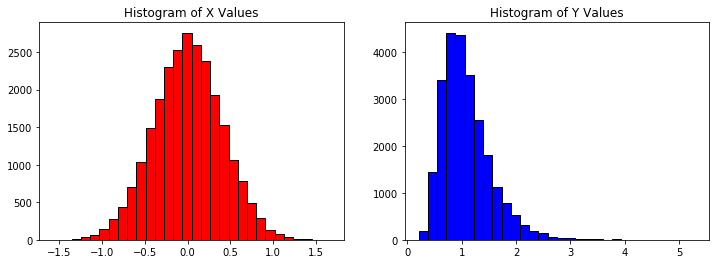

In [ ]:
plt.figure(figsize=[12,4])
plt.subplot(1, 2, 1)
plt.hist(X, edgecolor='black', color='red', bins=30)
plt.title('Histogram of X Values')

plt.subplot(1, 2, 2)
plt.hist(Y, edgecolor='black', color='blue', bins=30)
plt.title('Histogram of Y Values')

plt.show()

In [ ]:
print('Probability that Y is less than 0.5: ', round(numpy.mean(Y < 0.5),4))
print('Probability that Y is less than 1.0: ', round(numpy.mean(Y < 1.0),4))
print('Probability that Y is less than 2.0: ', round(numpy.mean(Y < 2.0),4))

Probability that Y is less than 0.5:  0.041
Probability that Y is less than 1.0:  0.4969
Probability that Y is less than 2.0:  0.9574


### Part 6: Stochastic Linear Relationships

In this section I will accomplish creating arrays representing samples collected from two variables 𝑋 and 𝑌 that satisfy the stochastic linear relationship. Then I will create a scatter plot showing the relationship between the values in these two variables. Finally I will calculate the correlation between these two variables.

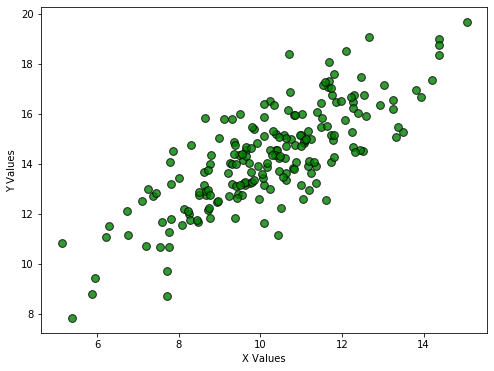

In [ ]:
numpy.random.seed(1)
x_vals=numpy.random.normal(loc=10, scale=2, size=200)
errors=numpy.random.normal(loc=0, scale=1.2, size=200)
y_vals=5.1+0.9*x_vals+errors
plt.figure(figsize=[8,6])
plt.scatter(x=x_vals, y=y_vals, s=60, alpha=0.8, color='green', edgecolor='black')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.show()

In [ ]:
diff_x=x_vals-numpy.mean(x_vals)
diff_y=y_vals-numpy.mean(y_vals)
top=numpy.sum(diff_x*diff_y)
bottom=numpy.sqrt(numpy.sum(diff_x**2)*numpy.sum(diff_y**2))
r=top/bottom
print('Correlation between X and Y: ', round(r,4))


Correlation between X and Y:  0.7861


### Part 7: Relationship between Life Expectancy and Per Capita GDP

In this section I will accomplish exploring the relationship between life expectancy and the natural log of per capita gdp from gapminder dataset. 
First I will create a scatter plot displaying the relationship between the the natural log of per capita gdp and life expectancy for 2018 data, with the color of points in the plot determined by the continent information.
Then I will generate a figure that separates the points for each of the continents into its own subplot.

In [ ]:
import pandas as pd
df = pd.read_csv('gapminder_data.txt', sep='\t') 
country = df.country.values
year = df.year.values
continent = df.continent.values
population = df.population.values
life_exp = df.life_exp.values
pcgdp = df.gdp_per_cap.values
gini = df.gini.values
df = None

In [ ]:
continent_list = ['africa', 'asia', 'americas', 'europe']
color_list = ['blue', 'green', 'red', 'orange']

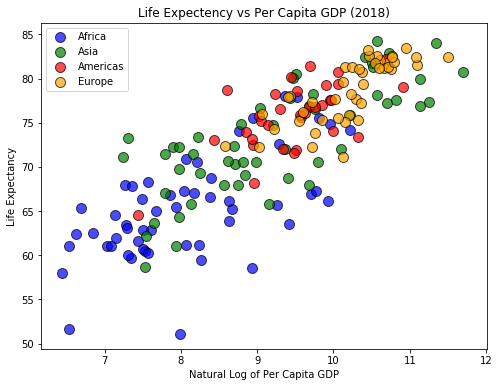

In [ ]:
plt.figure(figsize=[8,6])
for i in range(0, len(continent_list)):
    sel = ((year == 2018) & (continent == continent_list[i]))
    current_continent = continent_list[i]
    
    plt.scatter(x=numpy.log(pcgdp[sel]), y=life_exp[sel], s=100, alpha=0.7,
                color=color_list[i], edgecolor='black', label=current_continent.title())

plt.xlabel('Natural Log of Per Capita GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectency vs Per Capita GDP (2018)')
plt.legend()
plt.show()

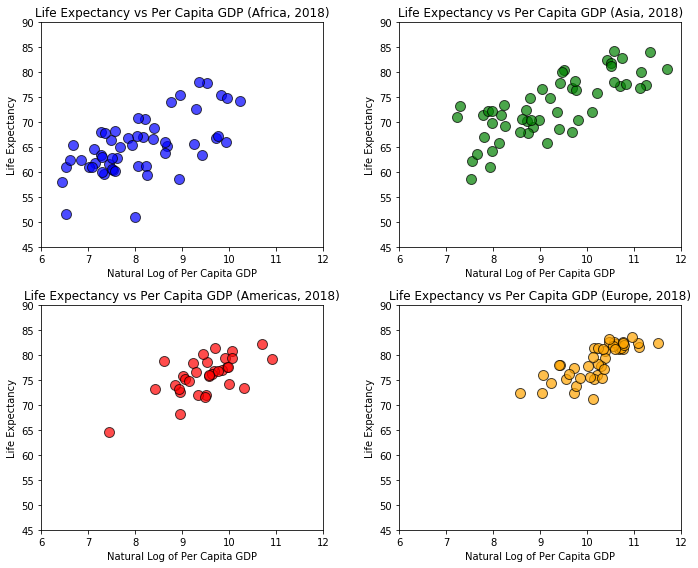

In [ ]:
plt.figure(figsize=[10,8])
for i in range(0,len(continent_list)):
    plt.subplot(2,2,i+1)
    sel = ((year == 2018) & (continent == continent_list[i]))
    current_continent = continent_list[i]
    plt.scatter(x=numpy.log(pcgdp[sel]), y=life_exp[sel], s=100, alpha=0.7,
                color=color_list[i], edgecolor='black')
    
    plt.xlim([6, 12])
    plt.ylim([45, 90])
    plt.xlabel('Natural Log of Per Capita GDP')
    plt.ylabel('Life Expectancy')
    plt.title('Life Expectancy vs Per Capita GDP (' + current_continent.title() + ', 2018)')

plt.tight_layout()
plt.show()


### Part 8: Trends by Country

I this section I will accomplish creating line plots representing the change in population and life expectancy for selected countries over time

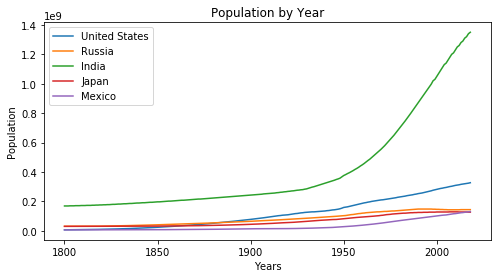

In [ ]:
year_range=range(1800, 2019)
plt.figure(figsize=[8,4])
plt.plot(year_range, population[country=='United States'], label='United States')
plt.plot(year_range, population[country=='Russia'],label='Russia')
plt.plot(year_range, population[country=='India'],label='India')
plt.plot(year_range, population[country=='Japan'],label='Japan')
plt.plot(year_range, population[country=='Mexico'],label='Mexico')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population by Year')
plt.show()

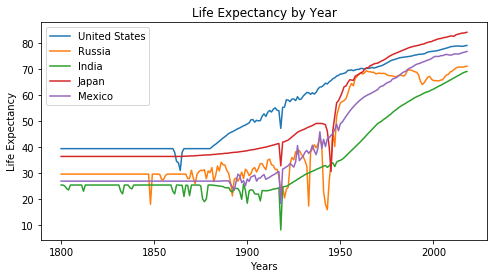

In [ ]:
year_range=range(1800, 2019)
plt.figure(figsize=[8,4])
plt.plot(year_range, life_exp[country=='United States'], label='United States')
plt.plot(year_range, life_exp[country=='Russia'],label='Russia')
plt.plot(year_range, life_exp[country=='India'],label='India')
plt.plot(year_range, life_exp[country=='Japan'],label='Japan')
plt.plot(year_range, life_exp[country=='Mexico'],label='Mexico')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Year')
plt.show()